# Heart Disease Classification

## 1- Import Libraries

In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import pickle

## 1. Data Preparation and Data Exploration

In [2]:
# Read data in the excel file
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Dataset

The dataset has 14 attributes:
 
* **age:** age in years.

* **sex:** sex (1 = male; 0 = female).

* **cp:** chest pain type (Value 0: typical angina; Value 1: atypical angina; Value 2: non-anginal pain; Value 3: asymptomatic).

* **trestbps:** resting blood pressure in mm Hg on admission to the hospital.

* **chol:** serum cholestoral in mg/dl.

* **fbs:** fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

* **restecg:** resting electrocardiographic results (Value 0: normal; Value 1: having ST-T wave abnormality; Value 2: probable or definite left ventricular hypertrophy).

* **thalach:** maximum heart rate achieved.

* **exang:** exercise induced angina (1 = yes; 0 = no)

* **oldpeak:** ST depression induced by exercise relative to rest.

* **slope:** the slope of the peak exercise ST segment (Value 0: upsloping; Value 1: flat; Value 2: downsloping).

* **ca:** number of major vessels (0-3) colored by flourosopy.

* **thal:** thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect).

* **target:** heart disease (1 = no, 2 = yes)


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

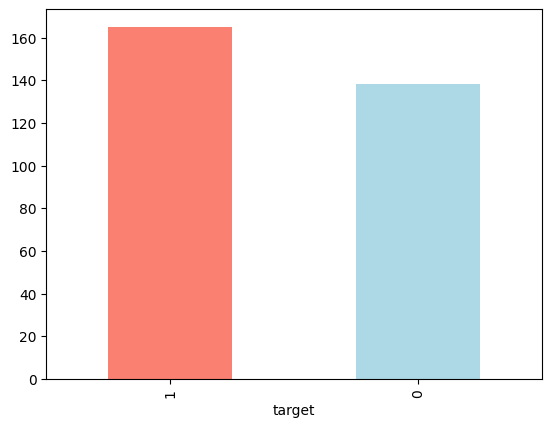

In [8]:
df.target.value_counts().plot(kind="bar", color=["salmon","lightblue"])


In [9]:
# Percentage of patients have and do not have heart disease
df['target'].value_counts()/df.shape[0]*100 

target
1    54.455446
0    45.544554
Name: count, dtype: float64

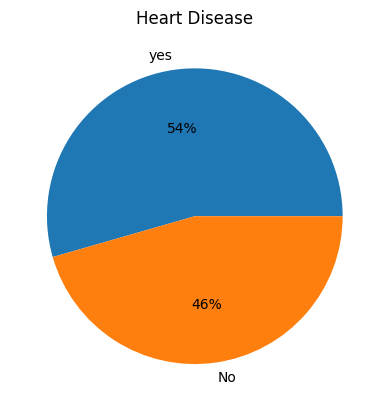

In [10]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()


**Note:**

The dataset contains 14 columns 5 of them are numerical values and 9 of them are categorical values. We can see also there are no missing values in this dataset. As for the data balancing, the data is relatively balanced, 56% of the persons in the dataset have heart disease.

### Attributes Correlation

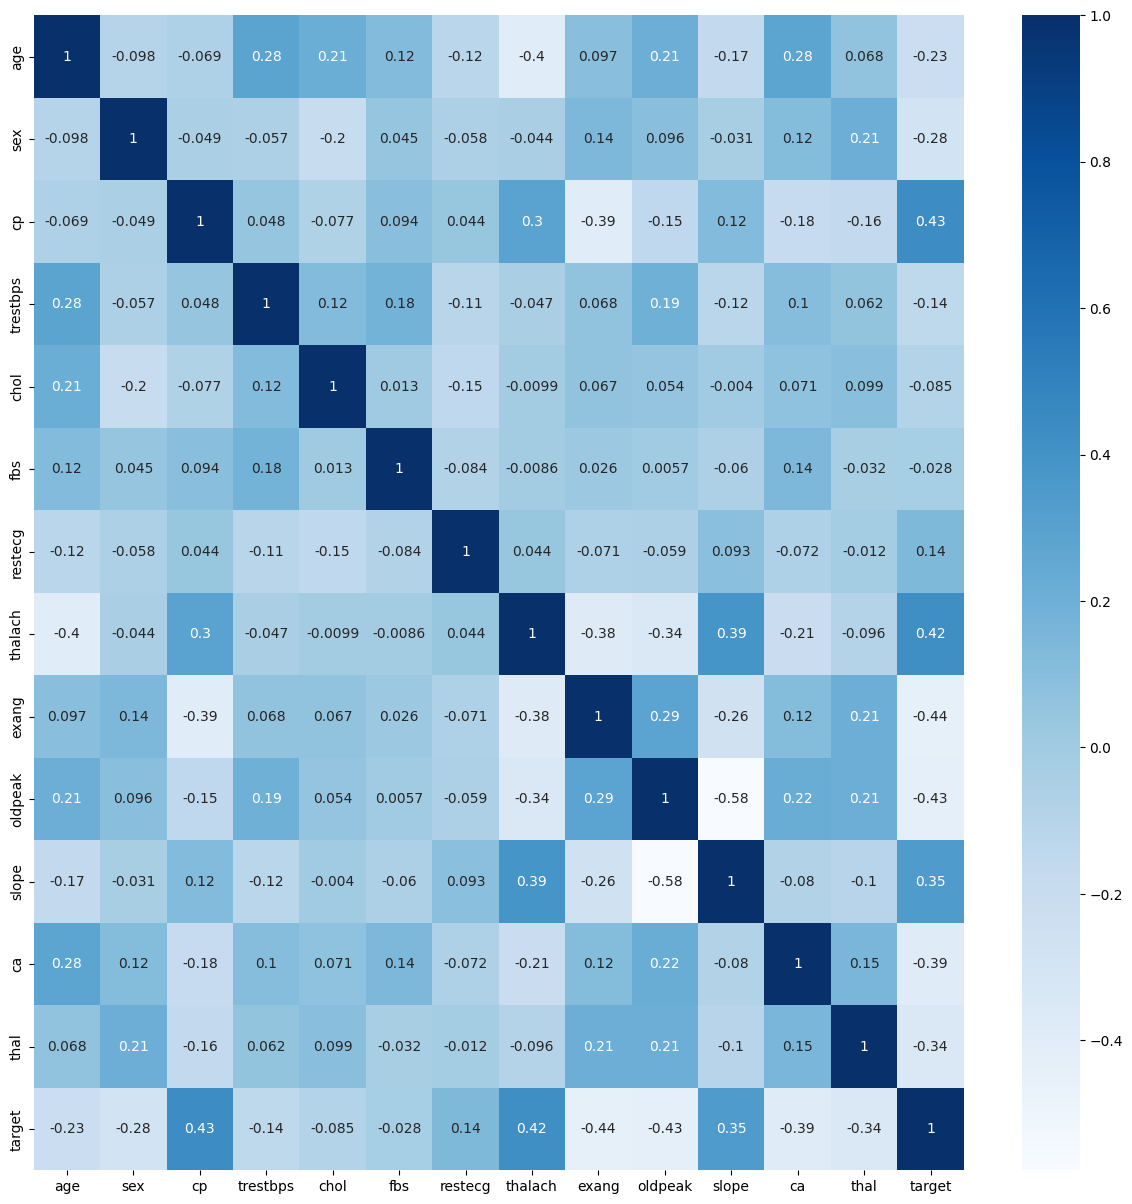

In [11]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

**Note:**

From the above correlation plot, the chest pain type (cp), exercise induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), number of major vessels (0-3) colored by flourosopy (ca) and thalassemia (thal) are correlated with the heart disease (target) directly.  We see also that there is an inverse proportion between the heart disease and maximum heart rate (thalch).

We can see also, there are a relation between the following attributes:

* The number of major vessels (0-3) colored by flourosopy (ca) and the age.
* ST depression induced by exercise relative to rest (oldpeak) and the slope of the peak exercise ST segment (slope).
* The chest pain type (cp), exercise induced angina (exang).
* maximum heart rate (thalch) and the age.



## Outliers

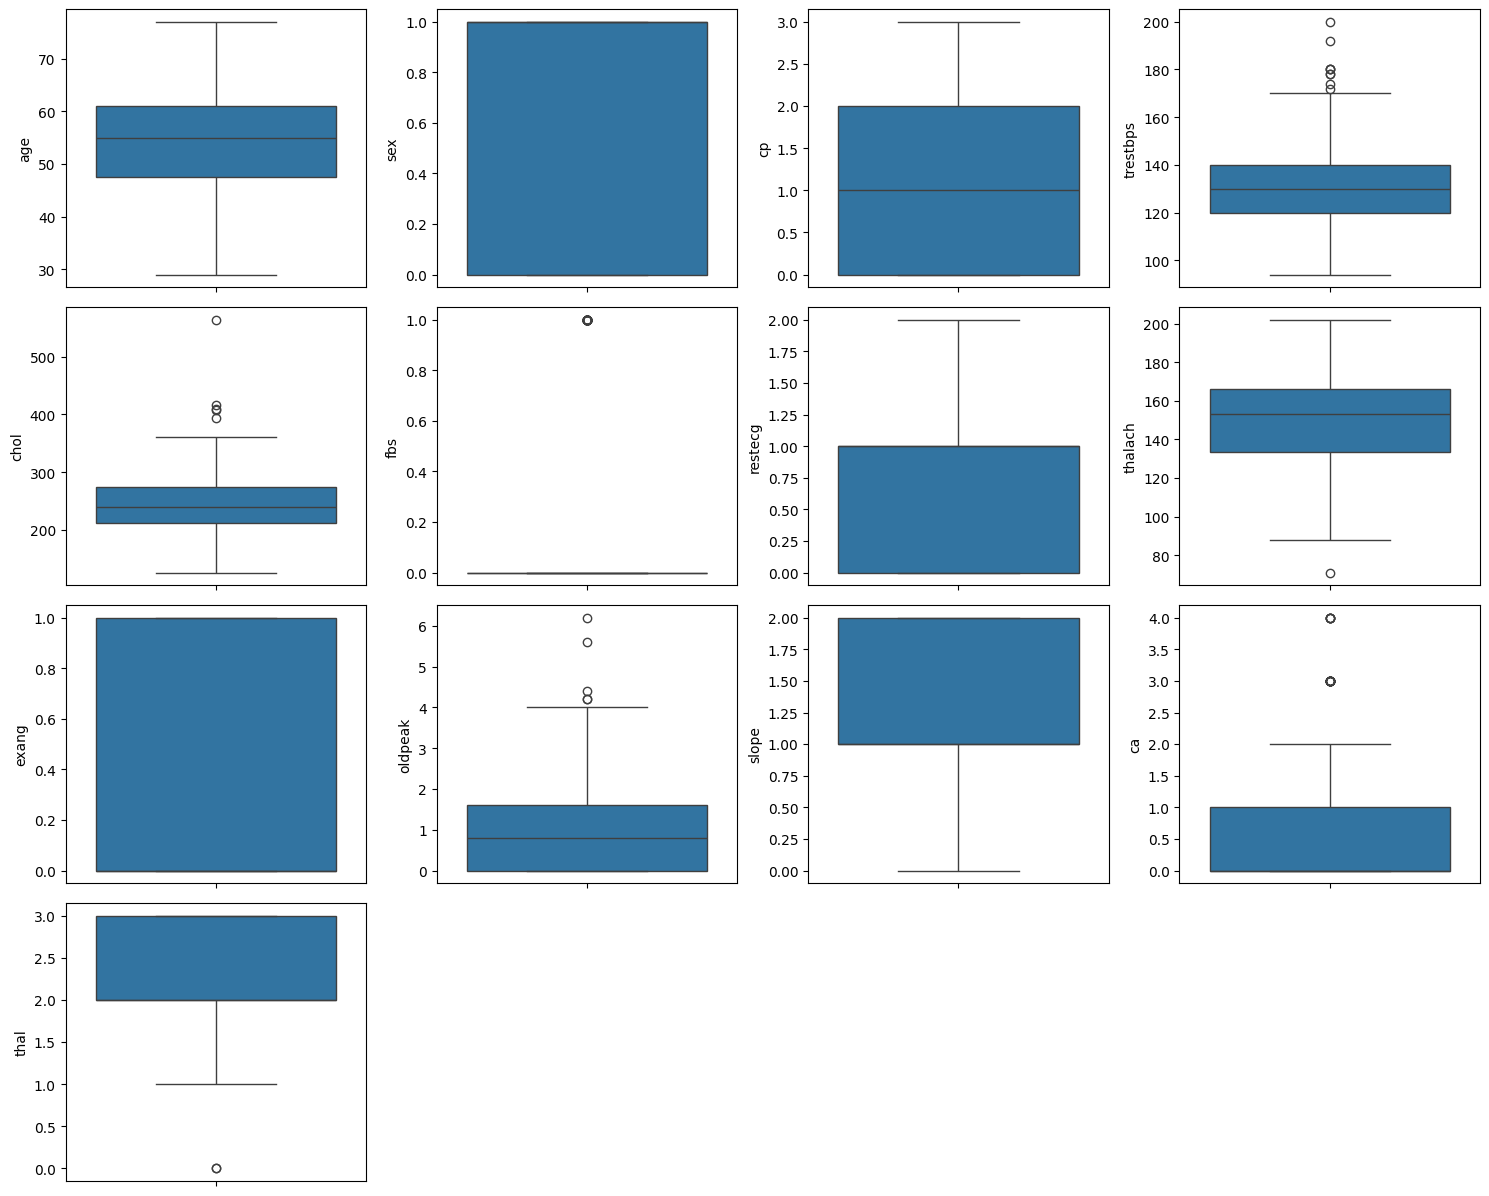

In [12]:
df1= df.drop('target',axis=1)
fig=plt.figure(figsize=(15,15))
for i in range(len(df1.columns)):
    fig.add_subplot(5,4,i+1)
    sns.boxplot(y=df1.iloc[:,i])

plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print("The shape of dataset before removing outliers",df.shape)
df=df.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",df.shape)

The shape of dataset before removing outliers (303, 14)
The shape of dataset after removing outliers (287, 14)


# Exploring the Dataset

#### we will explore each feature and it relation with the target 

### Age Exploration


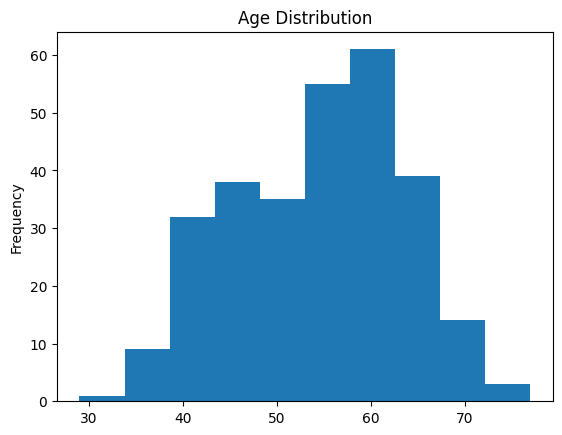

In [14]:
# Display age distribution
df['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [15]:
# Get min, max and average of the age
print('Min age: ', min(df['age']))
print('Max age: ', max(df['age']))
print('Average age: ', df['age'].mean())

Min age:  29
Max age:  77
Average age:  54.33449477351916


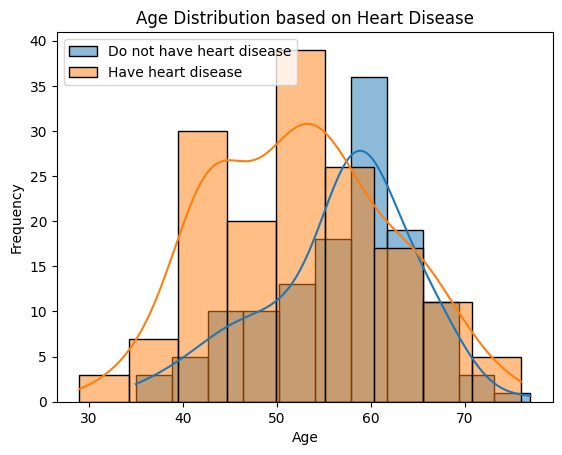

In [16]:
# Age Distribution based on Heart Disease
sns.histplot(df[df['target'] == 0]['age'], label='Do not have heart disease', kde=True)
sns.histplot(df[df['target'] == 1]['age'], label='Have heart disease', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

In [17]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(df[df['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(df[df['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', df[df['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  35
Max age of people who do not have heart disease:  77
Average age of people who do not have heart disease:  56.6124031007752


In [18]:
# Get min, max and average of the age of the people have heart diseas
print('Min age of people who have heart disease: ', min(df[df['target'] == 1]['age']))
print('Max age of people who have heart disease: ', max(df[df['target'] == 1]['age']))
print('Average age of people who have heart disease: ', df[df['target'] == 1]['age'].mean())

Min age of people who have heart disease:  29
Max age of people who have heart disease:  76
Average age of people who have heart disease:  52.4746835443038


**Note:**

From the data, we can say that the heart disease infects the old and young people, and the probability of the old people te be infected is higher than young people.  



### Gender Exploration

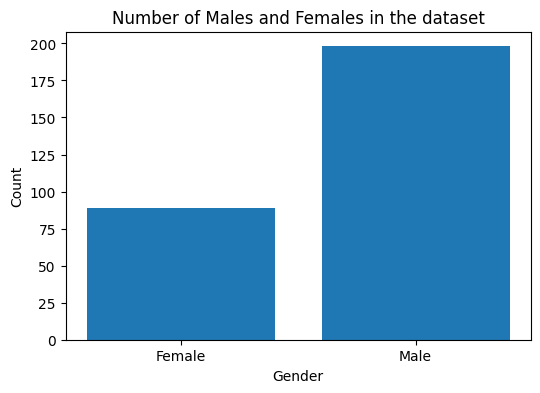

In [19]:
F = df[df['sex'] == 0].shape[0]  # Number of females
M = df[df['sex'] == 1].shape[0]  # Number of males

# Create a plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(x=['Female', 'Male'], height=[F, M])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Males and Females in the dataset')
plt.show()

### Chest Pain Type Exploration

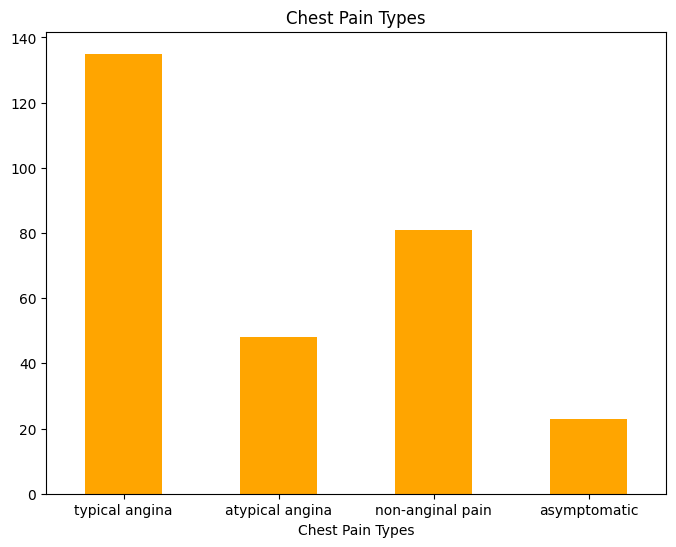

In [20]:
# Display chest pain types in bar chart
df.groupby(df['cp']).count()['target'].plot(kind='bar', title='Chest Pain Types', figsize=(8, 6), color='orange')
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation=0)
plt.show()

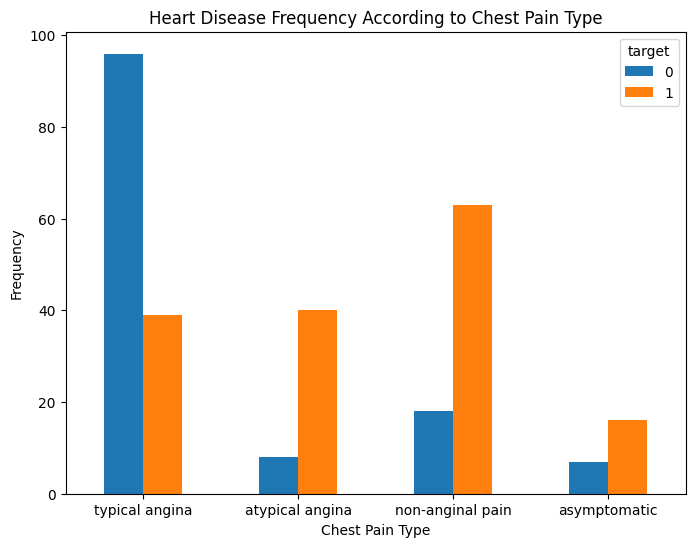

In [21]:
# Display chest pain types based on the target
pd.crosstab(df.cp,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

We can see that most of the people with heart disease have asymptomatic chest pain.



### Blood Pressure Exploration 

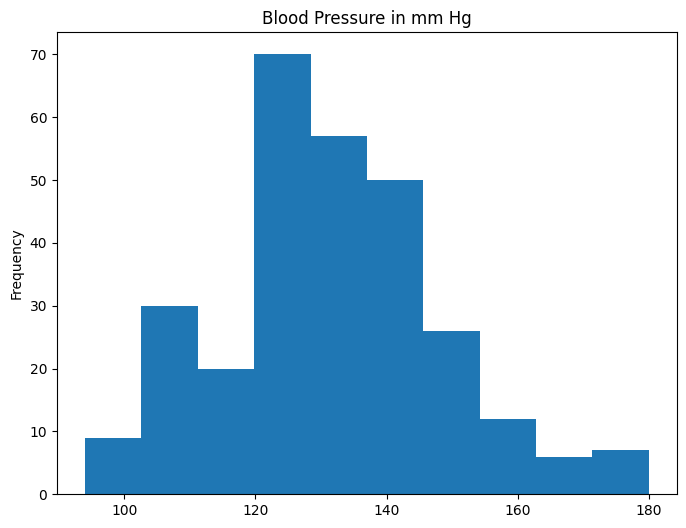

In [22]:
# Display blood pressure distribution
df['trestbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

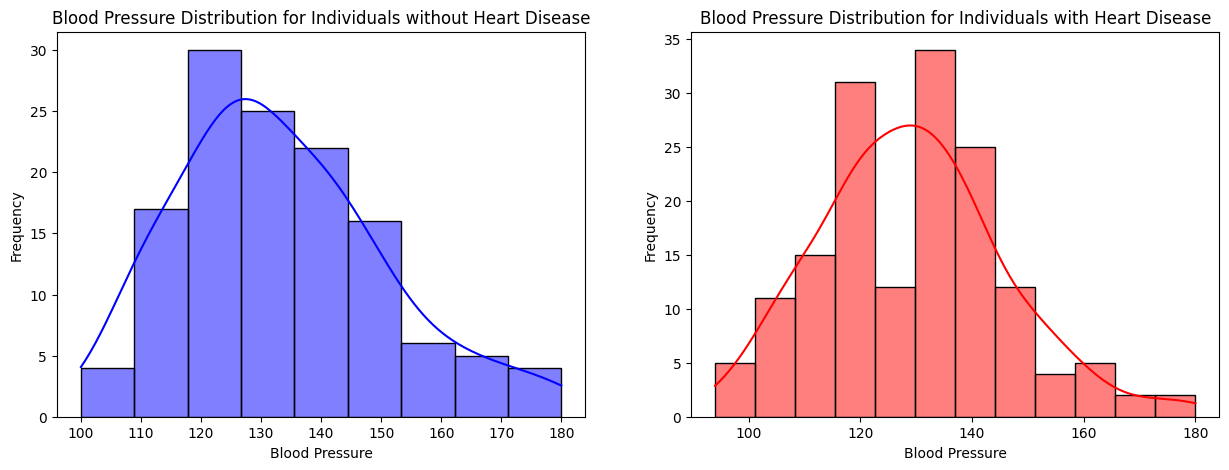

In [23]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot for individuals without heart disease
sns.histplot(df[df['target'] == 0]['trestbps'], label='Do not have heart disease', color='blue', kde=True, ax=axis1)
axis1.set(xlabel='Blood Pressure', ylabel='Frequency', title='Blood Pressure Distribution for Individuals without Heart Disease')

# Plot for individuals with heart disease
sns.histplot(df[df['target'] == 1]['trestbps'], label='Have heart disease', color='red', kde=True, ax=axis2)
axis2.set(xlabel='Blood Pressure', ylabel='Frequency', title='Blood Pressure Distribution for Individuals with Heart Disease')

plt.show()


In [24]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(df[df['target'] == 0]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(df[df['target'] == 0]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', df[df['target'] == 0]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  100
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  133.26356589147287


In [25]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(df[df['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(df[df['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', df[df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  94
Max blood pressure of people who have heart disease:  180
Average blood pressure of people who have heart disease:  129.19620253164558


### Cholestoral Exploration 

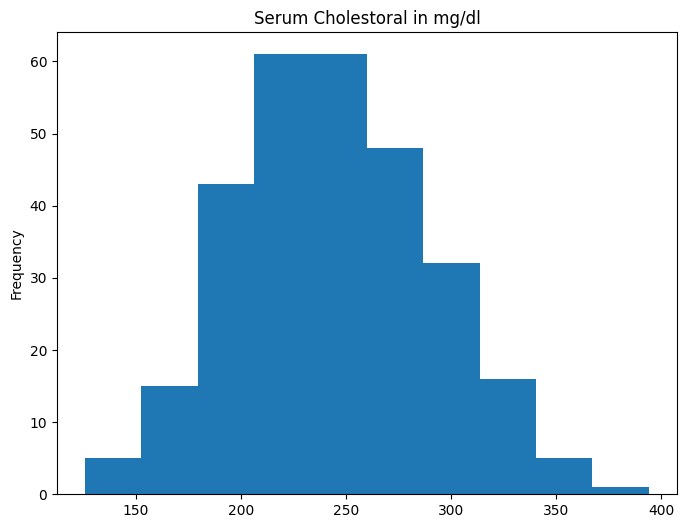

In [26]:
# Display Cholestoral distribution
df['chol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (8, 6))
plt.show()

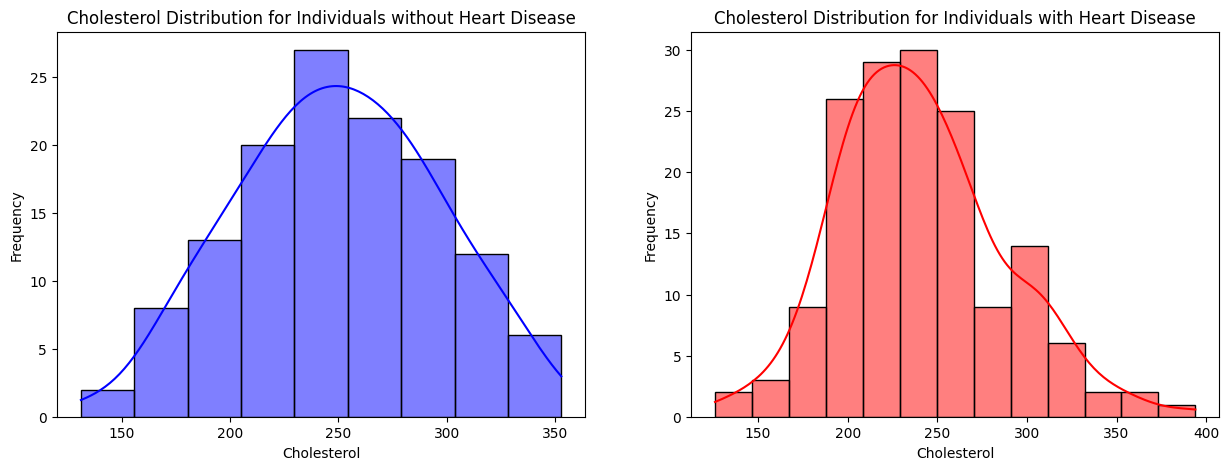

In [27]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot for individuals without heart disease
sns.histplot(df[df['target'] == 0]['chol'], label='Do not have heart disease', color='blue', kde=True, ax=axis1)
axis1.set(xlabel='Cholesterol', ylabel='Frequency', title='Cholesterol Distribution for Individuals without Heart Disease')

# Plot for individuals with heart disease
sns.histplot(df[df['target'] == 1]['chol'], label='Have heart disease', color='red', kde=True, ax=axis2)
axis2.set(xlabel='Cholesterol', ylabel='Frequency', title='Cholesterol Distribution for Individuals with Heart Disease')

plt.show()


In [28]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(df[df['target'] == 0]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(df[df['target'] == 0]['chol']))
print('Average cholestoral of people who do not have heart disease: ', df[df['target'] == 0]['chol'].mean())

Min cholestoral of people who do not have heart disease:  131
Max cholestoral of people who do not have heart disease:  353
Average cholestoral of people who do not have heart disease:  249.56589147286823


In [29]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(df[df['target'] == 1]['chol']))
print('Max cholestoral of people who have heart disease: ', max(df[df['target'] == 1]['chol']))
print('Average cholestorale of people who have heart disease: ', df[df['target'] == 1]['chol'].mean())

Min cholestoral of people who have heart disease:  126
Max cholestoral of people who have heart disease:  394
Average cholestorale of people who have heart disease:  240.36708860759492


### Fasting Blood Sugar  Exploration 

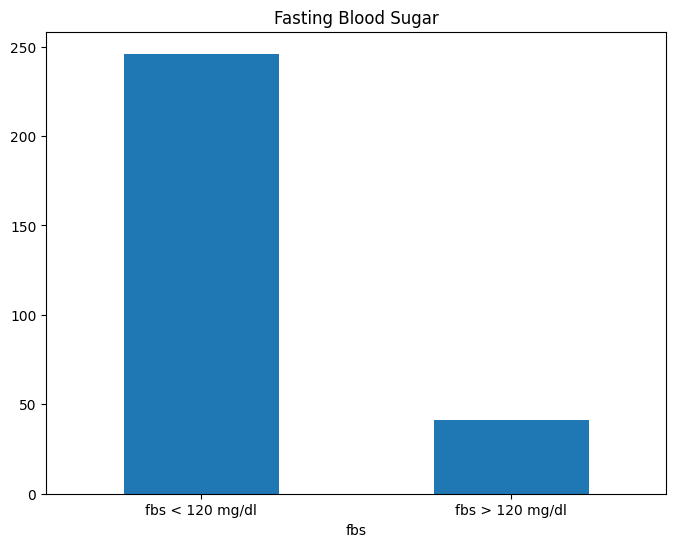

In [30]:
# Display fasting blood sugar in bar chart
df.groupby(df['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

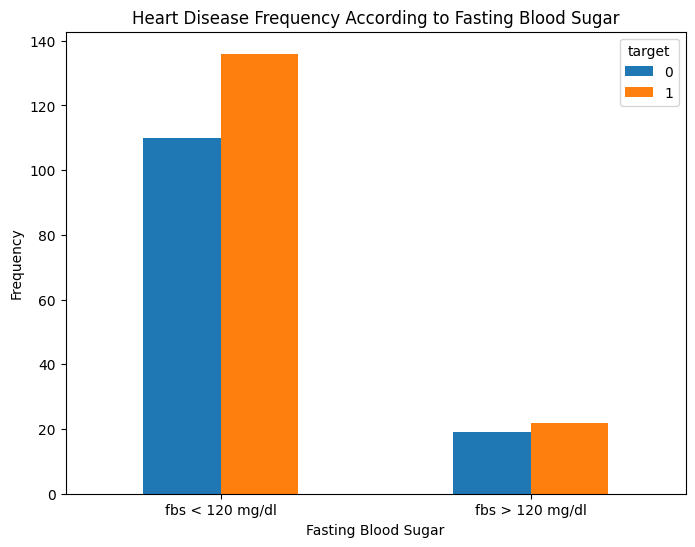

In [31]:
# Display fasting blood sugar based on the target
pd.crosstab(df.fbs,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

###  Electrocardiographic Results Exploration

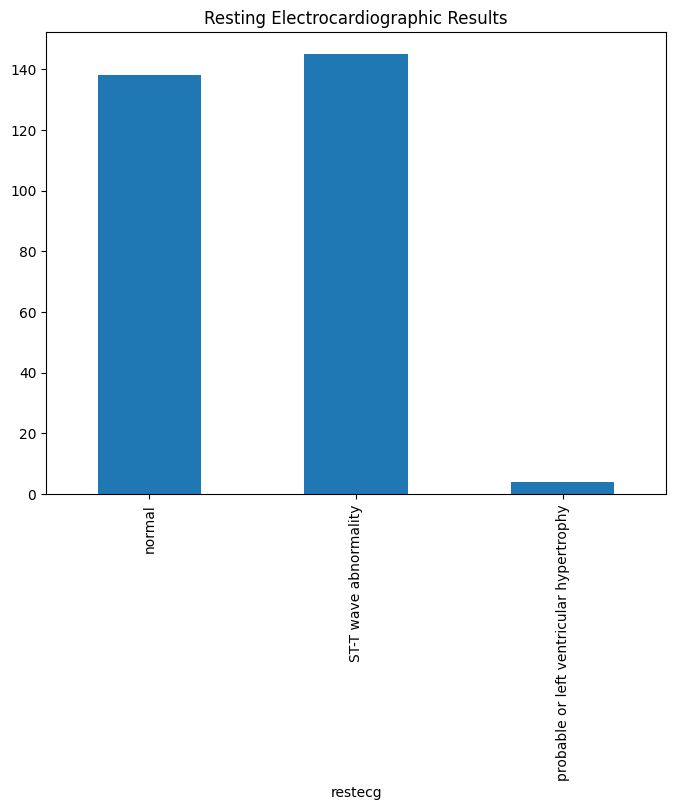

In [32]:
# Display electrocardiographic results in bar chart
df.groupby(df['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

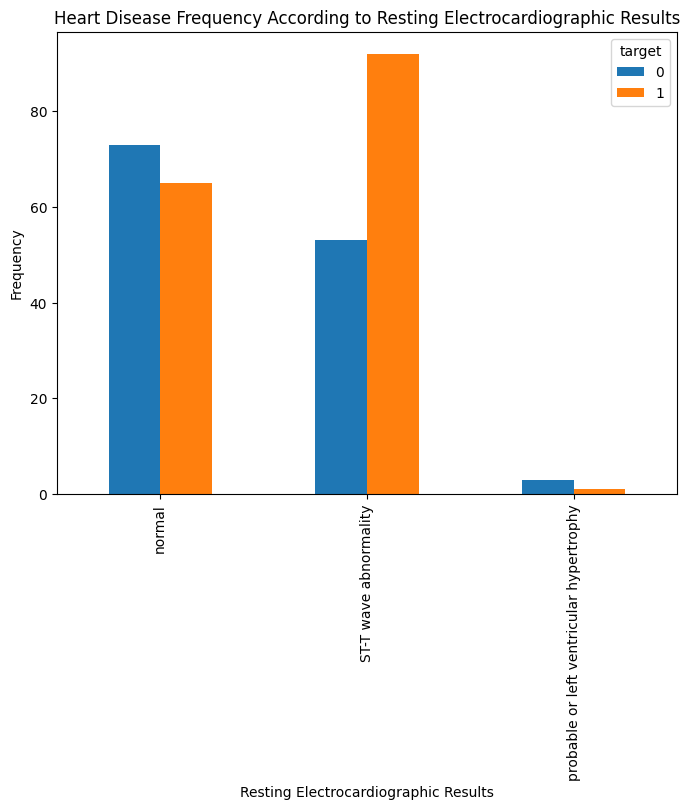

In [33]:
# Display resting electrocardiographic results based on the target
pd.crosstab(df.restecg,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

**Note:**

Usually the people who do not have heart disease have normal electrocardiographic, whereas the people who have heart disease have probable or left ventricular hypertrophy.

### Maximum Heart Rate Exploration

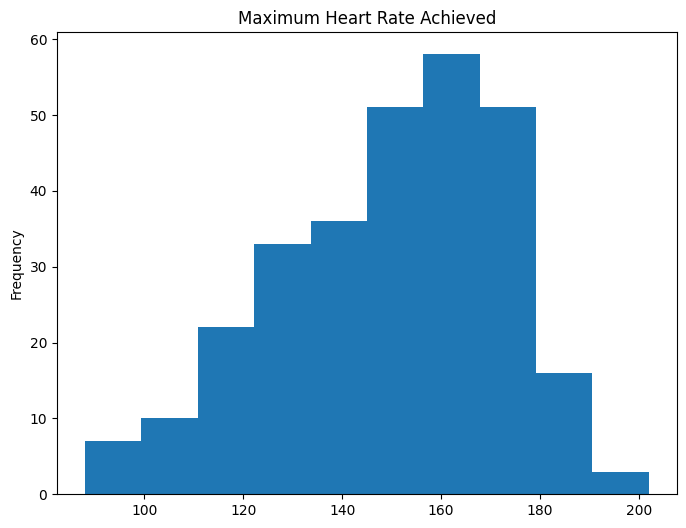

In [34]:
# Display maximum heart rate distribution
df['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()

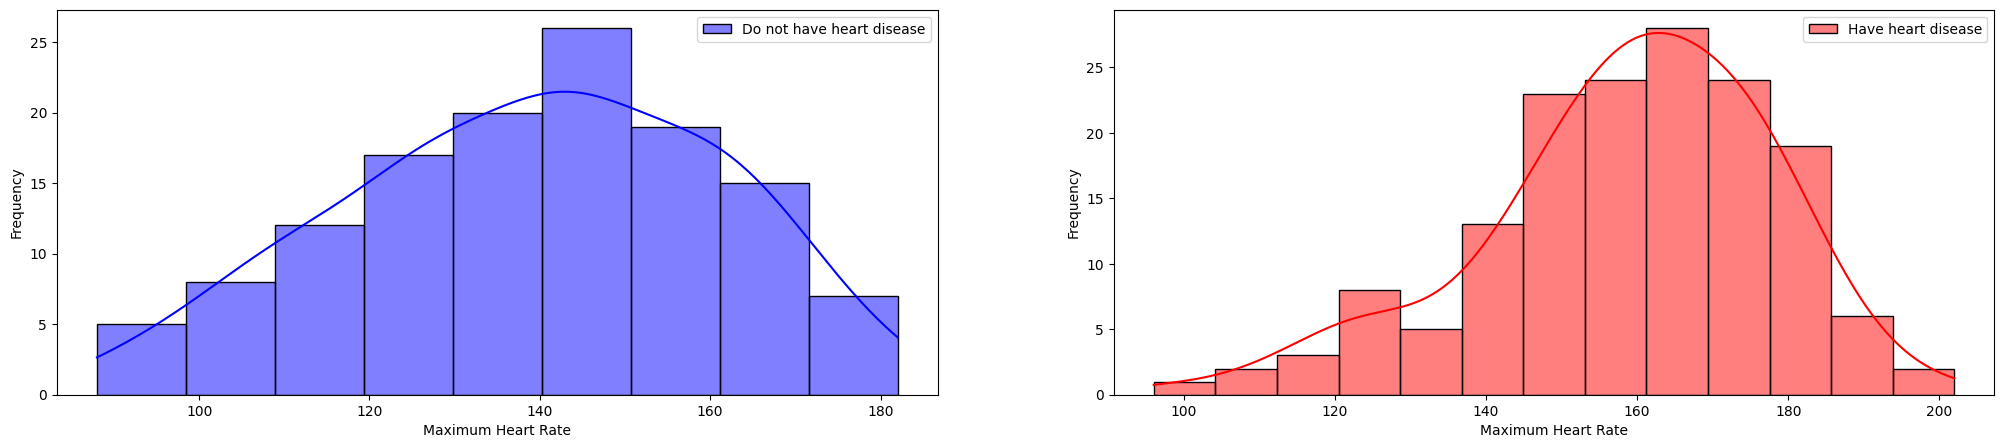

In [35]:
# Display maximum heart rate distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))

# Histogram for individuals without heart disease
sns.histplot(df[df['target'] == 0]['thalach'], label='Do not have heart disease', kde=True, color='blue', ax=axis1)
axis1.set(xlabel='Maximum Heart Rate', ylabel='Frequency')
axis1.legend()

# Histogram for individuals with heart disease
sns.histplot(df[df['target'] == 1]['thalach'], label='Have heart disease', kde=True, color='red', ax=axis2)
axis2.set(xlabel='Maximum Heart Rate', ylabel='Frequency')
axis2.legend()

plt.show()


In [36]:
# Get min, max and average of the maximum heart rate of the people do not have heart diseas
print('Min resting blood pressure of people who do not have heart disease: ', min(df[df['target'] == 0]['thalach']))
print('Max resting blood pressure of people who do not have heart disease: ', max(df[df['target'] == 0]['thalach']))
print('Average resting blood pressure of people who do not have heart disease: ', df[df['target'] == 0]['thalach'].mean())

Min resting blood pressure of people who do not have heart disease:  88
Max resting blood pressure of people who do not have heart disease:  182
Average resting blood pressure of people who do not have heart disease:  139.05426356589146


In [37]:
# Get min, max and average of the maximum heart rate of the people have heart diseas
print('Min maximum heart rate  of people who have heart disease: ', min(df[df['target'] == 1]['thalach']))
print('Max maximum heart rate people who have heart disease: ', max(df[df['target'] == 1]['thalach']))
print('Average maximum heart rate of people who have heart disease: ', df[df['target'] == 1]['thalach'].mean())

Min maximum heart rate  of people who have heart disease:  96
Max maximum heart rate people who have heart disease:  202
Average maximum heart rate of people who have heart disease:  158.58227848101265


**Note:**

The people who have heigh heart rate greater than 150 are more likely to have heart disease.

### Exercise Induced Angina Exploration

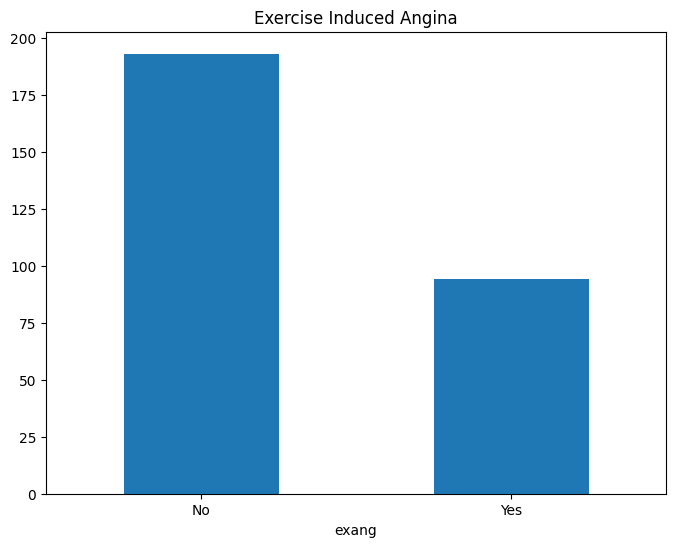

In [38]:
# Display exercise induced angina in bar chart
df.groupby(df['exang']).count()['target'].plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

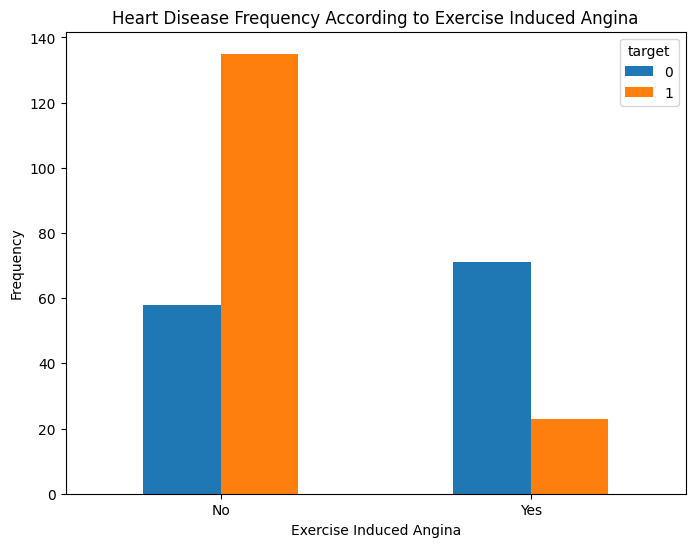

In [39]:
# Display exercise induced angina based on the target
pd.crosstab(df.exang,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

The people who suffer from exercise induced angina are more likely to likely to be infected with the heart disease.

### ST depression Exploration

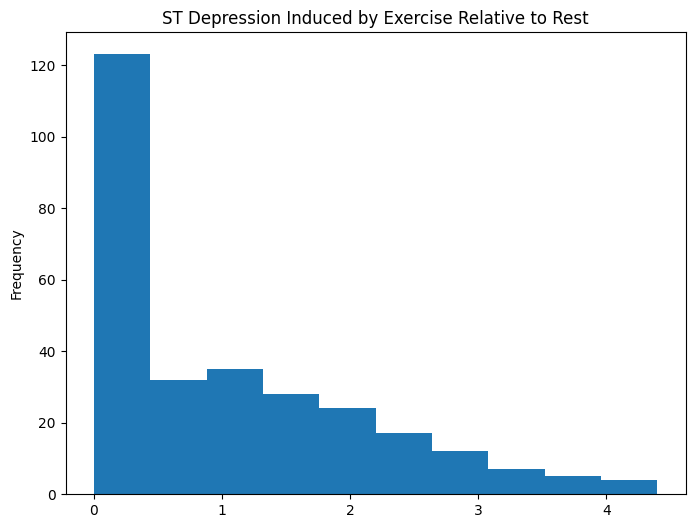

In [40]:
# Display ST depression induced by exercise relative to rest distribution
df['oldpeak'].plot(kind = 'hist', title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (8, 6))
plt.show()

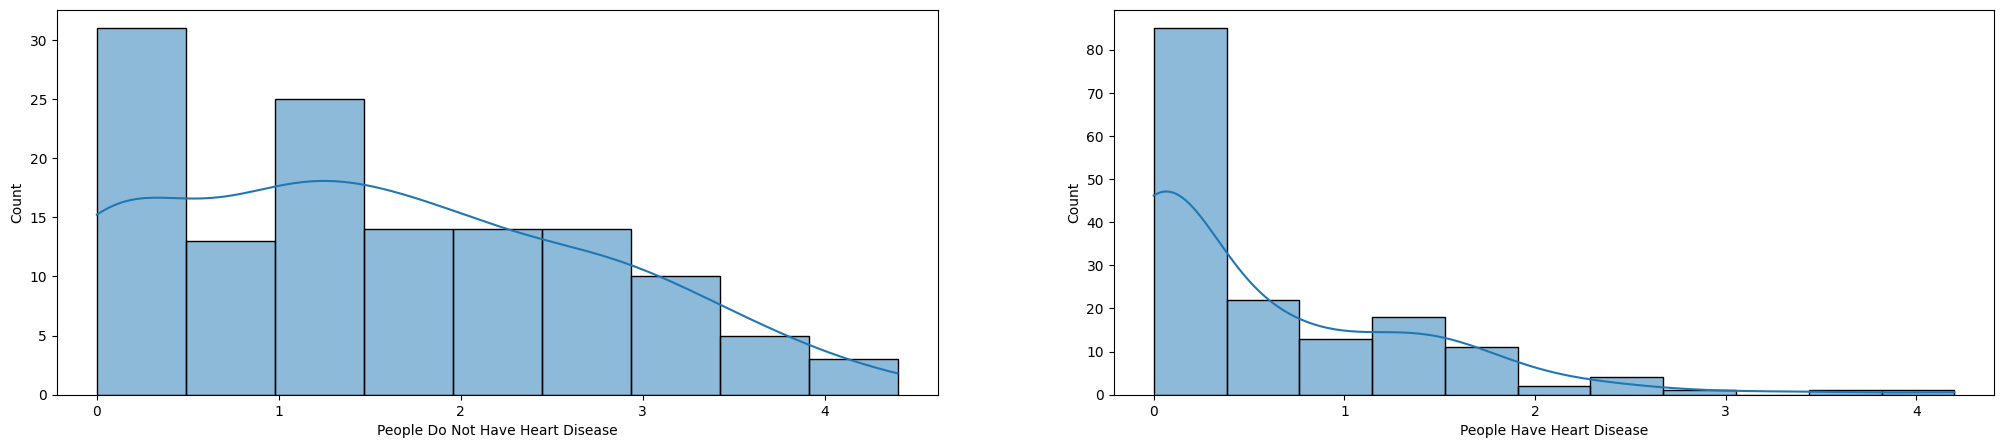

In [41]:
# Display ST depression distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
sns.histplot(df[df['target'] == 0]['oldpeak'], label='Do not have heart disease', kde=True, ax=axis1)
axis1.set(xlabel='People Do Not Have Heart Disease')
sns.histplot(df[df['target'] == 1]['oldpeak'], label='Have heart disease', kde=True, ax=axis2)
axis2.set(xlabel='People Have Heart Disease')
plt.show()

In [42]:
# Get min, max and average of the ST depression  of the people have heart diseas
print('Min ST depression of people who do not have heart disease: ', min(df[df['target'] == 0]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(df[df['target'] == 0]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', df[df['target'] == 0]['oldpeak'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  4.4
Average ST depression of people who do not have heart disease:  1.5116279069767442


In [43]:
# Get min, max and average of the ST depression of the people have heart diseas
print('Min ST depression of people who have heart disease: ', min(df[df['target'] == 1]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(df[df['target'] == 1]['oldpeak']))
print('Average ST depression of people not have heart disease: ', df[df['target'] == 1]['oldpeak'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  4.2
Average ST depression of people not have heart disease:  0.5911392405063292


**Note:**

The average ST depression of people who do not have heart disease is 0.6 and the average ST depression of people have heart disease is 1.5. 

### Slope Exploration

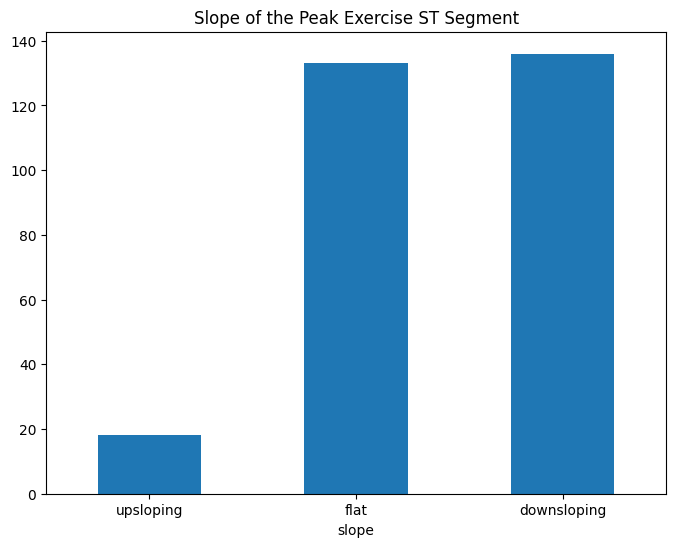

In [44]:
# Display slope of the peak exercise ST segment in bar chart
df.groupby(df['slope']).count()['target'].plot(kind = 'bar', title = 'Slope of the Peak Exercise ST Segment', figsize = (8, 6))
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

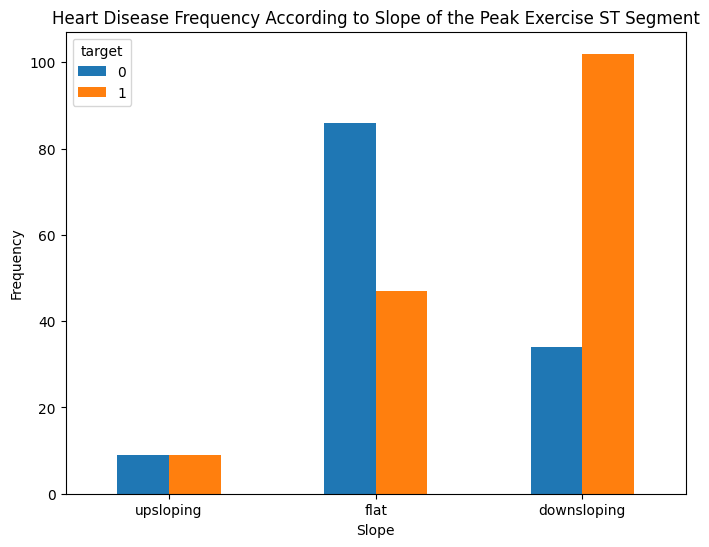

In [45]:
# Display slope of the peak exercise ST segment based on the target
pd.crosstab(df.slope,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

As it is clear, the people with flat peak ST segment are likely to have heart disease and usually the people who do not have heart disease have upsloping peak ST segment.

### Major Vessels Exploration

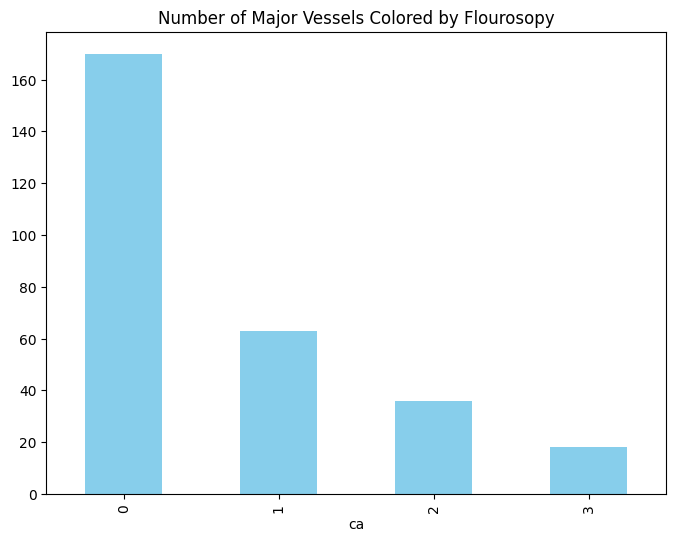

In [46]:
# Display number of major vessels in bar chart with specified color
df.groupby(df['ca']).count()['target'].plot(kind='bar', title='Number of Major Vessels Colored by Flourosopy', 
                                            figsize=(8, 6), color='skyblue')
plt.show()


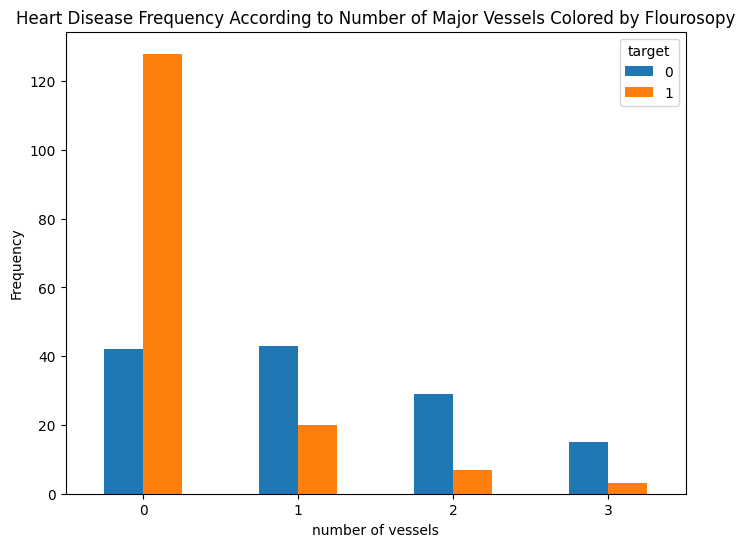

In [47]:
# Display number of vessels based on the target
pd.crosstab(df.ca,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

As it is clear, the people who do not have heart disease usually do not have major vessels colored by flourosopy.

### Thalassemia Exploration

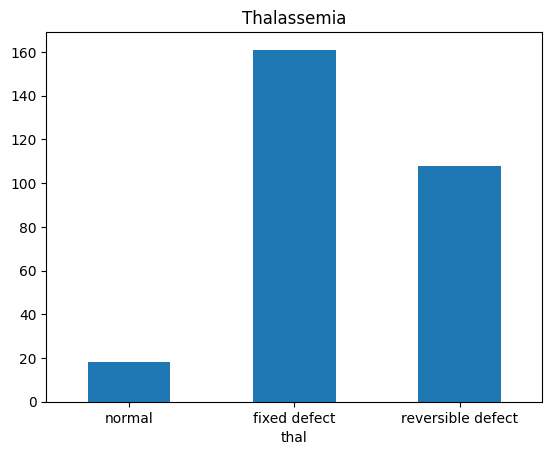

In [48]:
# Display thalassemia in bar chart
df.groupby(df['thal']).count()['target'].plot(kind = 'bar', title = 'Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.show()

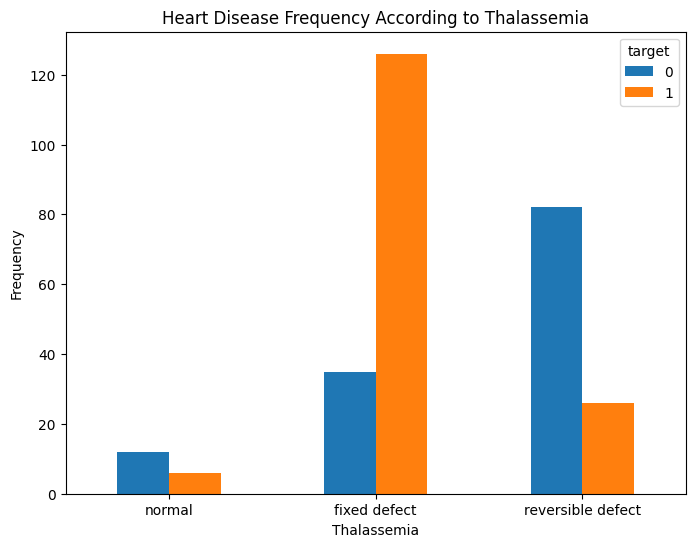

In [49]:
pd.crosstab(df.thal,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

As it is clear, the people with reversible defect are likely to have heart disease.

## 3. Modeling

### 3.1. Prepare Data for Machine Learning

In [50]:
# Initialize data and target
target = df['target']
features = df.drop(['target'], axis = 1)

In [51]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 0)


In [52]:

X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

### 3.2. Train and Evaluate Models

## Logistique regression


Confusion Matrix for Logistic Regression:


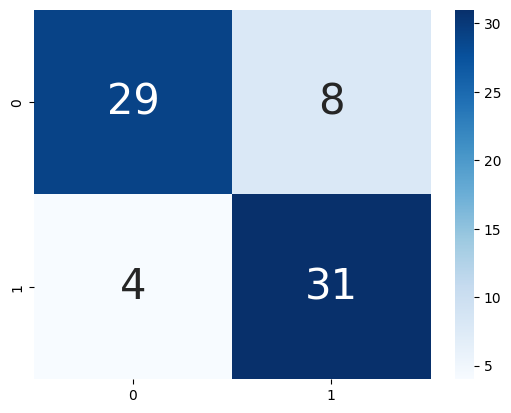

Accuracy for Logistic Regression: 0.8333333333333334
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        37
           1       0.79      0.89      0.84        35

    accuracy                           0.83        72
   macro avg       0.84      0.83      0.83        72
weighted avg       0.84      0.83      0.83        72



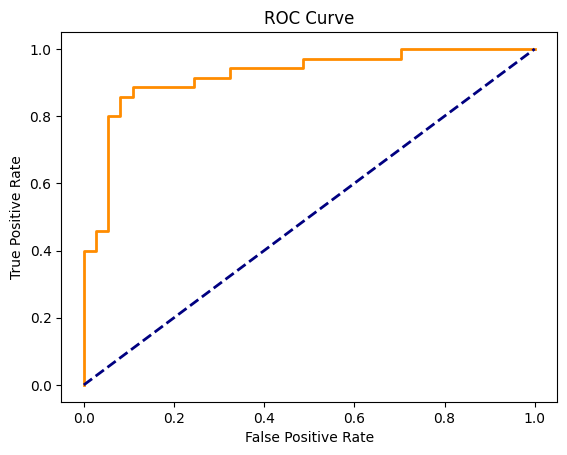

AUC Score for Logistic Regression: 0.922007722007722
Cross-Validation Scores:
[0.8372093  0.76744186 0.81395349 0.8372093  0.8372093 ]
Mean CV Accuracy: 0.8186046511627907


In [53]:
# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Initialize and fit Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict on the test set
logistic_regression_pred = logistic_regression.predict(X_test)

# Calculate accuracy
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_pred)

# Print confusion matrix
print("Confusion Matrix for Logistic Regression:")
cm=confusion_matrix(y_test, logistic_regression_pred)
ax=plt.axes()
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',ax=ax,annot_kws={'size':30})
plt.show()

# Print accuracy
print("Accuracy for Logistic Regression:", logistic_regression_accuracy)

from sklearn.metrics import classification_report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, logistic_regression_pred))
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
logistic_regression_probs = logistic_regression.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_regression_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(y_test, logistic_regression_probs)
print("AUC Score for Logistic Regression:", auc_score)
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5)

print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


## KNN

In [54]:
# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

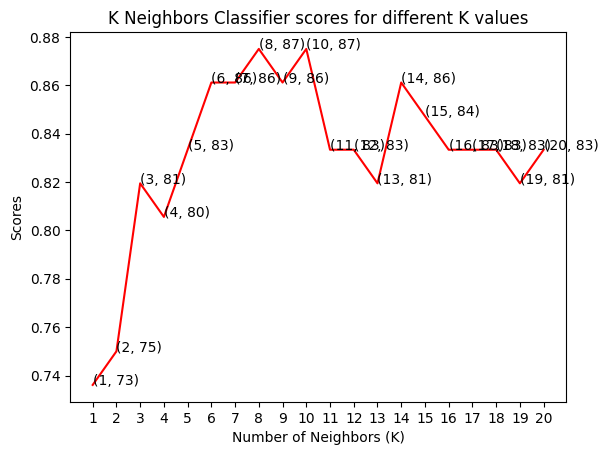

In [55]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, int(knn_scores[i-1]*100)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

The score for K Neighbors Classifier is 87.5% with 10 nieghbors.
              precision    recall  f1-score   support

           0       0.90      0.76      0.82        37
           1       0.78      0.91      0.84        35

    accuracy                           0.83        72
   macro avg       0.84      0.84      0.83        72
weighted avg       0.84      0.83      0.83        72



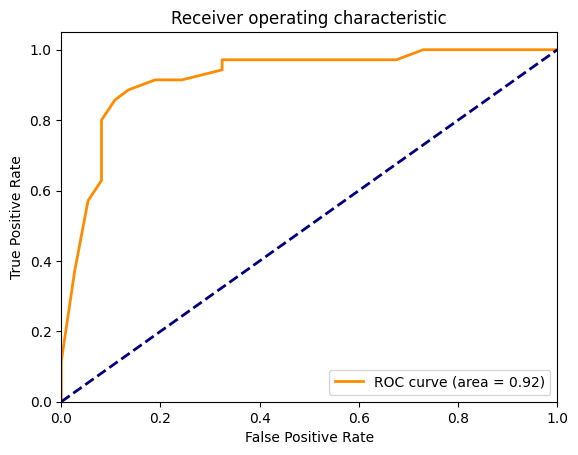

Cross-validation scores: [0.90697674 0.76744186 0.79069767 0.79069767 0.81395349]
Mean cross-validation score: 0.813953488372093


In [56]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[9]*100, 10))
from sklearn.metrics import classification_report

y_pred = knn_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = knn_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', np.mean(scores))

## Naive Bayes

Confusion Matrix for Naive Bayes:


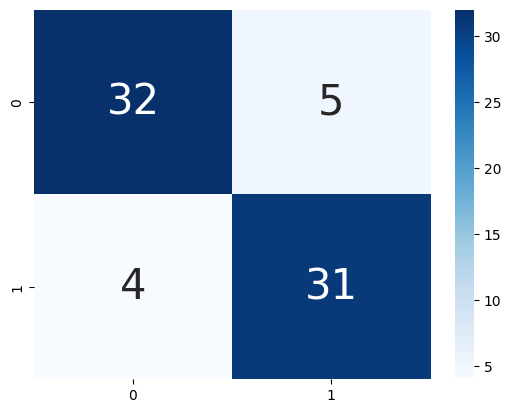

Accuracy for Naive Bayes: 0.875
Classification Report for naive bayes:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        37
           1       0.86      0.89      0.87        35

    accuracy                           0.88        72
   macro avg       0.88      0.88      0.87        72
weighted avg       0.88      0.88      0.88        72



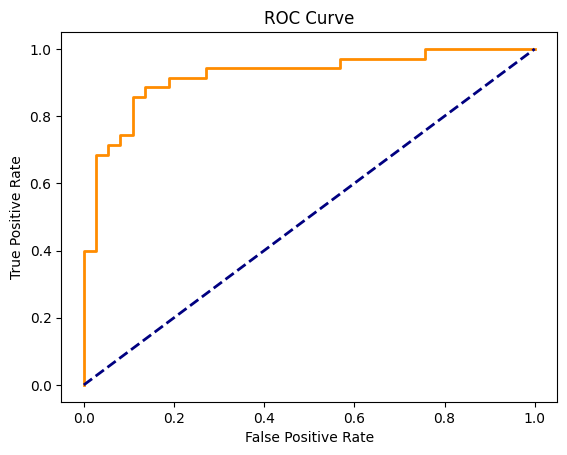

AUC Score for naive bayes: 0.9212355212355212
Cross-Validation Scores:
[0.88372093 0.81395349 0.74418605 0.79069767 0.79069767]
Mean CV Accuracy: 0.8046511627906977


In [57]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Initialize and fit Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predict on the test set
naive_bayes_pred = naive_bayes.predict(X_test)

# Calculate accuracy
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)

# Print confusion matrix
print("Confusion Matrix for Naive Bayes:")
cm=confusion_matrix(y_test, naive_bayes_pred)
ax=plt.axes()
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',ax=ax,annot_kws={'size':30})
plt.show()
# Print accuracy
print("Accuracy for Naive Bayes:", naive_bayes_accuracy)

from sklearn.metrics import classification_report
print("Classification Report for naive bayes:")
print(classification_report(y_test, naive_bayes_pred))
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
naive_bayes_probs = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, naive_bayes_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(y_test, naive_bayes_probs)
print("AUC Score for naive bayes:", auc_score)
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(naive_bayes, X_train, y_train, cv=5)

print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))



## Random Forest

In [58]:
# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))




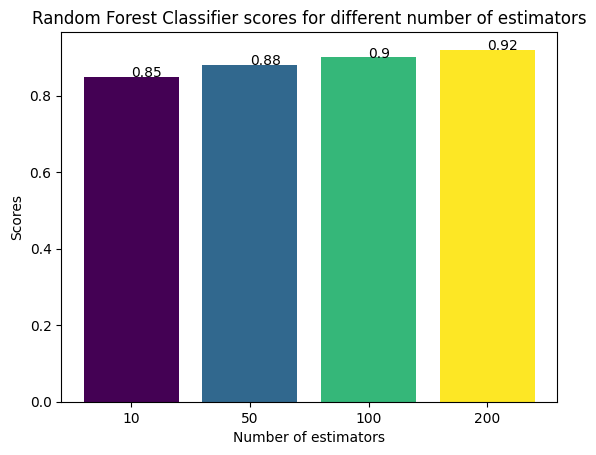

In [59]:
# Define the number of estimators and their corresponding scores
estimators = [10, 50, 100, 200]
rf_scores = [0.85, 0.88, 0.90, 0.92]

# Generate colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(estimators)))

# Create the bar chart
plt.bar([i for i in range(len(estimators))], rf_scores, color=colors, width=0.8)

# Add score values as text on top of each bar
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])

# Set x-axis ticks and labels
plt.xticks(ticks=[i for i in range(len(estimators))], labels=[str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')
plt.show()

The score for Random Forest Classifier is 88.0% with [100, 500] estimators.
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        37
           1       0.83      0.86      0.85        35

    accuracy                           0.85        72
   macro avg       0.85      0.85      0.85        72
weighted avg       0.85      0.85      0.85        72



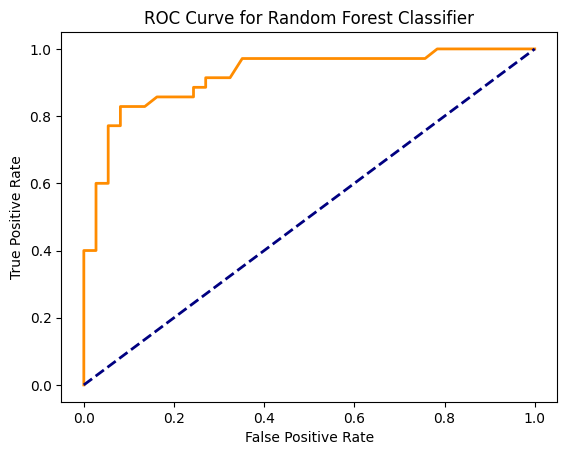

AUC Score for Random Forest Classifier: 0.9204633204633205
Cross-Validation Scores:
[0.81395349 0.74418605 0.88372093 0.72093023 0.81395349]
Mean CV Accuracy: 0.7953488372093023


In [60]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, rf_pred))
from sklearn.metrics import roc_curve, roc_auc_score

rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.show()

auc_score = roc_auc_score(y_test, rf_probs)
print("AUC Score for Random Forest Classifier:", auc_score)
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

## decision tree

Confusion Matrix for Decision Tree:


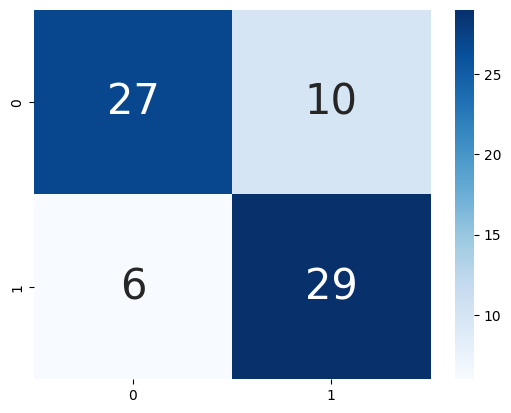

Accuracy for Decision Tree: 0.7777777777777778
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        37
           1       0.74      0.83      0.78        35

    accuracy                           0.78        72
   macro avg       0.78      0.78      0.78        72
weighted avg       0.78      0.78      0.78        72

AUC Score for Decision Tree: 0.7791505791505792
Cross-Validation Scores: [0.76744186 0.79069767 0.72093023 0.6744186  0.74418605]
Mean Cross-Validation Score: 0.7395348837209302


In [61]:
# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Initialize and fit Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predict on the test set
decision_tree_pred = decision_tree.predict(X_test)

# Calculate accuracy
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)

# Print confusion matrix
print("Confusion Matrix for Decision Tree:")
cm=confusion_matrix(y_test, decision_tree_pred)
ax=plt.axes()
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',ax=ax,annot_kws={'size':30})
plt.show()


# Print accuracy
print("Accuracy for Decision Tree:", decision_tree_accuracy)

# Generate classification report
print("Classification Report for Decision Tree:")
print(classification_report(y_test, decision_tree_pred))

# Calculate AUC score
decision_tree_auc = roc_auc_score(y_test, decision_tree_pred)
print("AUC Score for Decision Tree:", decision_tree_auc)

# Perform cross-validation
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


##  SVM

In [62]:
# List of kernels to iterate over
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize empty lists to store evaluation results
svc_accuracies = []
svc_cm = []
svc_auc_scores = []
svc_cv_scores = []

# Iterate over each kernel
for kernel in kernels:
    # Initialize SVC classifier with current kernel
    svc_classifier = SVC(kernel=kernel)
    
    # Fit the classifier on the training data
    svc_classifier.fit(X_train, y_train)
    
    # Predict on the test set
    svc_pred = svc_classifier.predict(X_test)
    
    # Calculate accuracy and append to list
    svc_accuracy = accuracy_score(y_test, svc_pred)
    svc_accuracies.append(svc_accuracy)
    
    # Calculate confusion matrix and append to list
    svc_cm.append(confusion_matrix(y_test, svc_pred))
    
    # Calculate AUC score and append to list
    svc_auc_scores.append(roc_auc_score(y_test, svc_pred))
    
    # Perform cross-validation and append scores to list
    cv_scores = cross_val_score(svc_classifier, X_train, y_train, cv=5)
    svc_cv_scores.append(cv_scores)

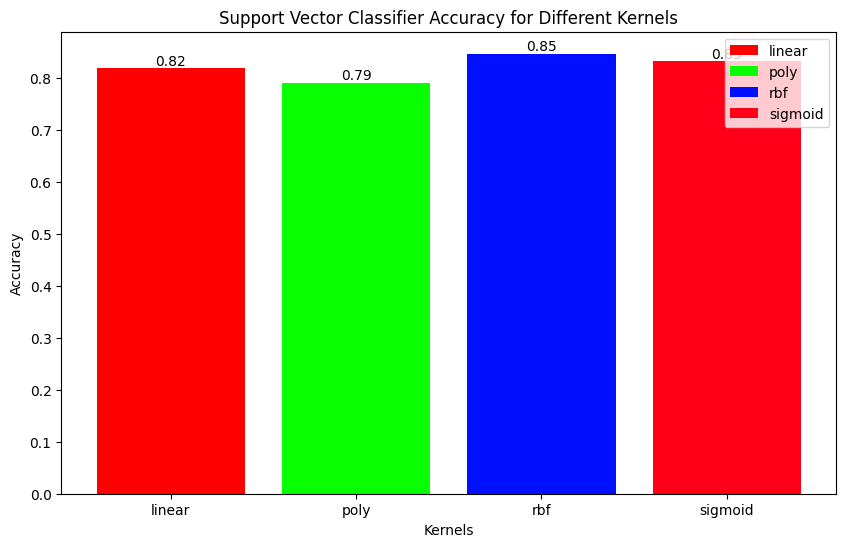

Confusion Matrix for SVC with kernel 'linear':
[[28  9]
 [ 4 31]]
Confusion Matrix for SVC with kernel 'poly':
[[24 13]
 [ 2 33]]
Confusion Matrix for SVC with kernel 'rbf':
[[30  7]
 [ 4 31]]
Confusion Matrix for SVC with kernel 'sigmoid':
[[28  9]
 [ 3 32]]
AUC Score for SVC with kernel 'linear': 0.8212355212355212
AUC Score for SVC with kernel 'poly': 0.7957528957528959
AUC Score for SVC with kernel 'rbf': 0.8482625482625482
AUC Score for SVC with kernel 'sigmoid': 0.8355212355212356
Mean Cross-Validation Score for SVC with kernel 'linear': 0.8186046511627907
Mean Cross-Validation Score for SVC with kernel 'poly': 0.7627906976744186
Mean Cross-Validation Score for SVC with kernel 'rbf': 0.8232558139534885
Mean Cross-Validation Score for SVC with kernel 'sigmoid': 0.8186046511627907


In [63]:
# Plotting
colors = plt.cm.hsv(np.linspace(0, 1, len(kernels)))  # Define colors
plt.figure(figsize=(10, 6))

for i in range(len(kernels)):
    plt.bar(kernels[i], svc_accuracies[i], color=colors[i], label=kernels[i])
    plt.text(i, svc_accuracies[i], round(svc_accuracies[i], 2), ha='center', va='bottom')

plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.title('Support Vector Classifier Accuracy for Different Kernels')
plt.legend()
plt.show()

# Print confusion matrices
for i in range(len(kernels)):
    print(f"Confusion Matrix for SVC with kernel '{kernels[i]}':")
    print(svc_cm[i])

# Print AUC scores
for i in range(len(kernels)):
    print(f"AUC Score for SVC with kernel '{kernels[i]}':", svc_auc_scores[i])

# Print mean cross-validation scores
for i in range(len(kernels)):
    print(f"Mean Cross-Validation Score for SVC with kernel '{kernels[i]}':", np.mean(svc_cv_scores[i]))

In [64]:
# Find the index of the kernel with the highest accuracy
best_kernel_index = np.argmax(svc_accuracies)
best_kernel = kernels[best_kernel_index]
best_accuracy = svc_accuracies[best_kernel_index]

print(f"The best kernel is '{best_kernel}' with an accuracy of {best_accuracy:.2f}.")


The best kernel is 'rbf' with an accuracy of 0.85.


## Gussian Process

Confusion Matrix for Gaussian Process Classifier:


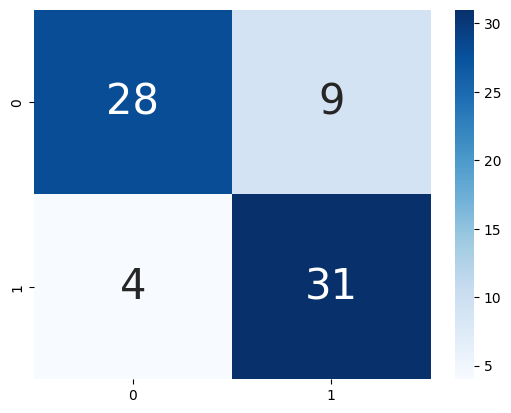

Accuracy for Gaussian Process Classifier: 0.8194444444444444
Classification Report for Gaussian Process Classifier:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        37
           1       0.78      0.89      0.83        35

    accuracy                           0.82        72
   macro avg       0.82      0.82      0.82        72
weighted avg       0.83      0.82      0.82        72

AUC Score for Gaussian Process Classifier: 0.8212355212355212
Cross-Validation Scores for Gaussian Process Classifier: [0.8372093  0.74418605 0.69767442 0.72093023 0.86046512]
Mean Cross-Validation Score for Gaussian Process Classifier: 0.7720930232558139


In [65]:
from sklearn.gaussian_process import GaussianProcessClassifier
# Initialize Gaussian Process Classifier
gpc = GaussianProcessClassifier()

# Fit the classifier on the training data
gpc.fit(X_train, y_train)

# Predict on the test set
gpc_pred = gpc.predict(X_test)

# Calculate accuracy
gpc_accuracy = accuracy_score(y_test, gpc_pred)

# Print confusion matrix
print("Confusion Matrix for Gaussian Process Classifier:")
cm = confusion_matrix(y_test, gpc_pred)
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, annot_kws={'size':30})
plt.show()

# Print accuracy
print("Accuracy for Gaussian Process Classifier:", gpc_accuracy)

# Generate classification report
print("Classification Report for Gaussian Process Classifier:")
print(classification_report(y_test, gpc_pred))

# Calculate AUC score
gpc_auc = roc_auc_score(y_test, gpc_pred)
print("AUC Score for Gaussian Process Classifier:", gpc_auc)

# Perform cross-validation
gpc_cv_scores = cross_val_score(gpc, X_train, y_train, cv=5)
print("Cross-Validation Scores for Gaussian Process Classifier:", gpc_cv_scores)
print("Mean Cross-Validation Score for Gaussian Process Classifier:", np.mean(gpc_cv_scores))


## Quadratic Discriminant Analysis

Confusion Matrix for Quadratic Discriminant Analysis:


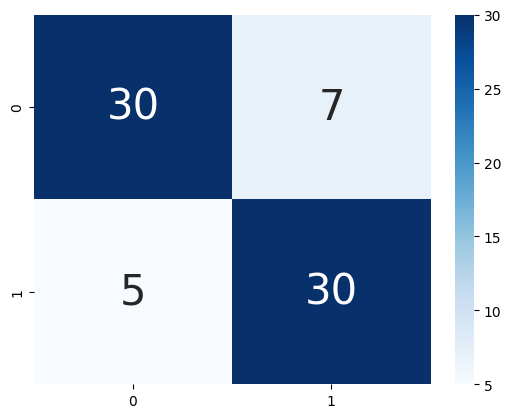

Accuracy for Quadratic Discriminant Analysis: 0.8333333333333334
Classification Report for Quadratic Discriminant Analysis:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        37
           1       0.81      0.86      0.83        35

    accuracy                           0.83        72
   macro avg       0.83      0.83      0.83        72
weighted avg       0.83      0.83      0.83        72

AUC Score for Quadratic Discriminant Analysis: 0.8339768339768339
Cross-Validation Scores for Quadratic Discriminant Analysis: [0.81395349 0.79069767 0.74418605 0.79069767 0.76744186]
Mean Cross-Validation Score for Quadratic Discriminant Analysis: 0.7813953488372093


In [66]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Initialize Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()

# Fit the classifier on the training data
qda.fit(X_train, y_train)

# Predict on the test set
qda_pred = qda.predict(X_test)

# Calculate accuracy
qda_accuracy = accuracy_score(y_test, qda_pred)

# Print confusion matrix
print("Confusion Matrix for Quadratic Discriminant Analysis:")
cm = confusion_matrix(y_test, qda_pred)
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, annot_kws={'size':30})
plt.show()

# Print accuracy
print("Accuracy for Quadratic Discriminant Analysis:", qda_accuracy)

# Generate classification report
print("Classification Report for Quadratic Discriminant Analysis:")
print(classification_report(y_test, qda_pred))

# Calculate AUC score
qda_auc = roc_auc_score(y_test, qda_pred)
print("AUC Score for Quadratic Discriminant Analysis:", qda_auc)

# Perform cross-validation
qda_cv_scores = cross_val_score(qda, X_train, y_train, cv=5)
print("Cross-Validation Scores for Quadratic Discriminant Analysis:", qda_cv_scores)
print("Mean Cross-Validation Score for Quadratic Discriminant Analysis:", np.mean(qda_cv_scores))

## XGBoost Classifier


Confusion Matrix for XGBoost Classifier:


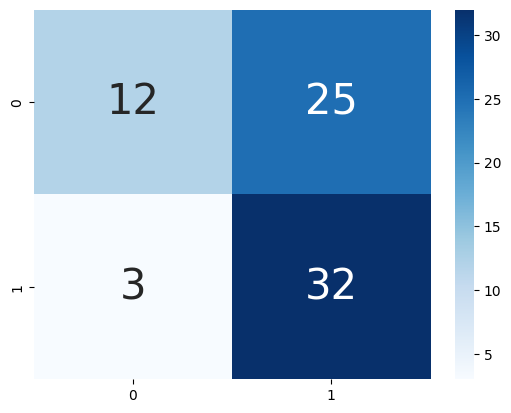

Accuracy for XGBoost Classifier: 0.6111111111111112
Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.80      0.32      0.46        37
           1       0.56      0.91      0.70        35

    accuracy                           0.61        72
   macro avg       0.68      0.62      0.58        72
weighted avg       0.68      0.61      0.58        72

AUC Score for XGBoost Classifier: 0.6193050193050194
Cross-Validation Scores for XGBoost Classifier: [0.8372093  0.79069767 0.86046512 0.6744186  0.79069767]
Mean Cross-Validation Score for XGBoost Classifier: 0.7906976744186046


In [67]:
import xgboost as xgb

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Fit the classifier on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_pred = xgb_model.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Print confusion matrix
print("Confusion Matrix for XGBoost Classifier:")
cm = confusion_matrix(y_test, xgb_pred)
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, annot_kws={'size':30})
plt.show()

# Print accuracy
print("Accuracy for XGBoost Classifier:", xgb_accuracy)

# Generate classification report
print("Classification Report for XGBoost Classifier:")
print(classification_report(y_test, xgb_pred))

# Calculate AUC score
xgb_auc = roc_auc_score(y_test, xgb_pred)
print("AUC Score for XGBoost Classifier:", xgb_auc)

# Perform cross-validation
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
print("Cross-Validation Scores for XGBoost Classifier:", xgb_cv_scores)
print("Mean Cross-Validation Score for XGBoost Classifier:", np.mean(xgb_cv_scores))


Logistic Regression: Mean Accuracy: 0.8186046511627907, Standard Deviation: 0.027120706487652566
K Neighbors Classifier: Mean Accuracy: 0.813953488372093, Standard Deviation: 0.06240189704650576
Naive Bayes: Mean Accuracy: 0.8046511627906977, Standard Deviation: 0.04557190219131496
Random Forest Classifier: Mean Accuracy: 0.813953488372093, Standard Deviation: 0.03891441983879421
Decision Tree Classifier: Mean Accuracy: 0.7720930232558139, Standard Deviation: 0.042628611115868305
SVM with linear kernel: Mean Accuracy: 0.8186046511627907, Standard Deviation: 0.017403057612902083
SVM with rbf kernel: Mean Accuracy: 0.8232558139534885, Standard Deviation: 0.03480611522580413
Gaussian Process Classifier: Mean Accuracy: 0.7720930232558139, Standard Deviation: 0.06478320128922847
Quadratic Discriminant Analysis: Mean Accuracy: 0.7813953488372093, Standard Deviation: 0.02371636983066411
XGBoost Classifier: Mean Accuracy: 0.7906976744186046, Standard Deviation: 0.06411185466088476


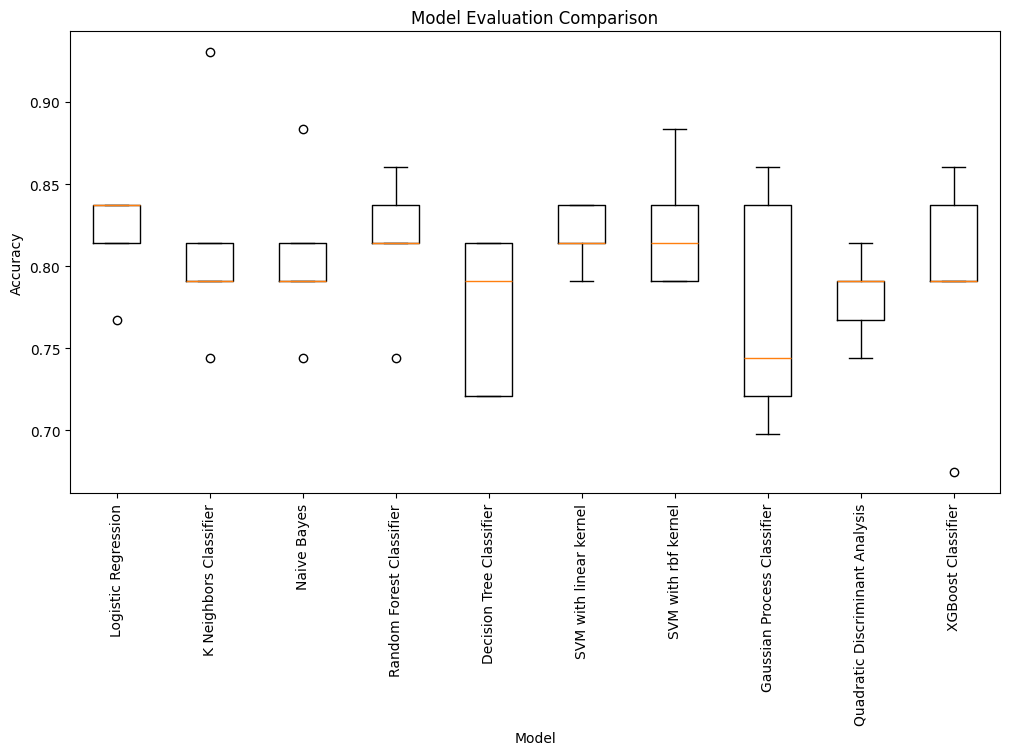

In [68]:
# Define models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K Neighbors Classifier', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('SVM with linear kernel', SVC(kernel='linear')),
    ('SVM with rbf kernel', SVC(kernel='rbf')),
    ('Gaussian Process Classifier', GaussianProcessClassifier()),
    ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis()),
    ('XGBoost Classifier', xgb.XGBClassifier())
]

# Evaluate models
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean Accuracy: {cv_results.mean()}, Standard Deviation: {cv_results.std()}")

# Plot model evaluation results
plt.figure(figsize=(12, 6))
plt.boxplot(results, labels=names)
plt.title('Model Evaluation Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()

In [69]:
# Define the scores and algorithms
scores = [logistic_regression_accuracy*100, naive_bayes_accuracy*100, svc_accuracies[2]*100, knn_scores[9]*100,
          decision_tree_accuracy*100, rf_scores[1]*100, xgb_accuracy*100, gpc_accuracy*100, qda_accuracy*100
         ]
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors",
              "Decision Tree", "Random Forest", "XGBoost", "Gaussian Process Classifier",
              "Quadratic Discriminant Analysis"]

# Print accuracy scores for each algorithm
for i in range(len(algorithms)):
    print("The accuracy score achieved using " + algorithms[i] + " is: " + str(scores[i]) + " %")

The accuracy score achieved using Logistic Regression is: 83.33333333333334 %
The accuracy score achieved using Naive Bayes is: 87.5 %
The accuracy score achieved using Support Vector Machine is: 84.72222222222221 %
The accuracy score achieved using K-Nearest Neighbors is: 87.5 %
The accuracy score achieved using Decision Tree is: 77.77777777777779 %
The accuracy score achieved using Random Forest is: 88.0 %
The accuracy score achieved using XGBoost is: 61.111111111111114 %
The accuracy score achieved using Gaussian Process Classifier is: 81.94444444444444 %
The accuracy score achieved using Quadratic Discriminant Analysis is: 83.33333333333334 %


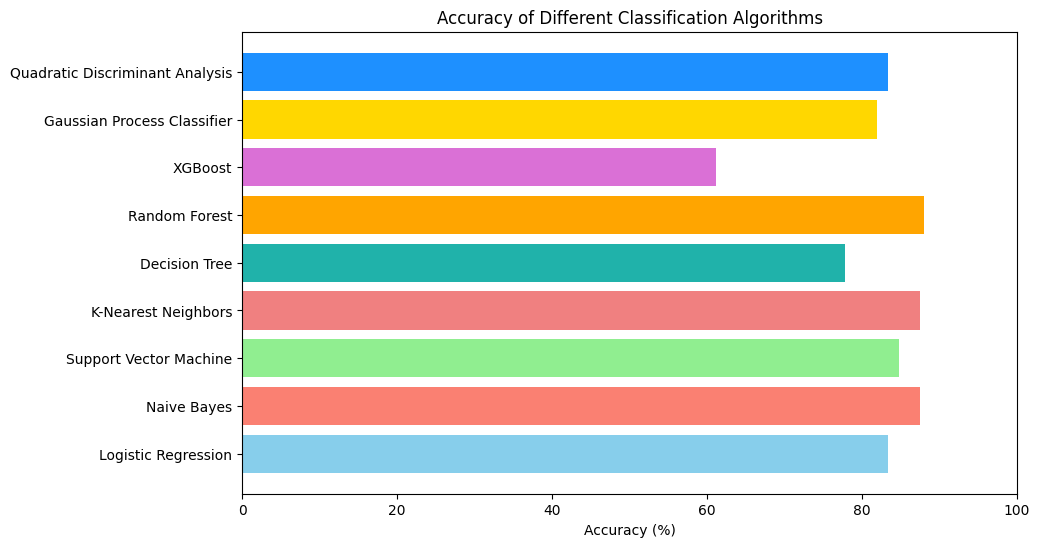

In [70]:
# Define colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightseagreen', 'orange', 
          'orchid', 'gold', 'dodgerblue', 'mediumspringgreen', 'indianred']

# Plot accuracy scores for each algorithm with different colors
plt.figure(figsize=(10, 6))
plt.barh(algorithms, scores, color=colors)
plt.xlabel('Accuracy (%)')
plt.title('Accuracy of Different Classification Algorithms')
plt.xlim(0, 100)

# Show plot
plt.show()

## Voting Classifier

In [71]:
from sklearn.ensemble import VotingClassifier

# Initialize classifiers with probability=True where applicable
logistic_regression = LogisticRegression()
naive_bayes = GaussianNB()
svc_classifier = SVC(probability=True)
rf_classifier = RandomForestClassifier()

# Create a VotingClassifier with soft voting
voting_classifier = VotingClassifier(
    estimators=[('lr', logistic_regression), ('nb', naive_bayes), ('svc', svc_classifier), ('rf', rf_classifier)], 
    voting='soft')

# Fit the model
voting_classifier.fit(X_train, y_train)

# Make predictions
y_prediction = voting_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_prediction)
print('Accuracy:', accuracy)



Accuracy: 0.8611111111111112


In [72]:
# Creating a pickle file for the classifier
filename = 'heart-disease-prediction-model.pkl'
pickle.dump(voting_classifier, open(filename, 'wb'))
